# Lab 3: Policy Search

## Task

Write agents able to play [*Nim*](https://en.wikipedia.org/wiki/Nim), with an arbitrary number of rows and an upper bound $k$ on the number of objects that can be removed in a turn (a.k.a., *subtraction game*).

The player **taking the last object wins**.

* Task3.1: An agent using fixed rules based on *nim-sum* (i.e., an *expert system*)
* Task3.2: An agent using evolved rules
* Task3.3: An agent using minmax
* Task3.4: An agent using reinforcement learning

## Instructions

* Create the directory `lab3` inside the course repo 
* Put a `README.md` and your solution (all the files, code and auxiliary data if needed)

In [1]:
%load_ext autoreload
%autoreload 2

from task1_lib import gabriele, pure_random, fixed_rules_strategy
from task2_lib import run_GA, strategy_0, strategy_1, strategy_2
from task4_lib import task4_run, task4_Q
from nim_utils import evaluate, evaluate_GA, play_match

# Task 1

In [2]:
NUM_MATCHES = 100
NIM_SIZE = 10
K_SIZE = None

print(f"Win-rate against {gabriele.__name__}: {evaluate(fixed_rules_strategy, gabriele, NUM_MATCHES, NIM_SIZE, k_size=K_SIZE)}")
print(f"Win-rate against {pure_random.__name__}: {evaluate(fixed_rules_strategy, pure_random, NUM_MATCHES, NIM_SIZE, k_size=K_SIZE)}")


Win-rate against gabriele: 1.0
Win-rate against pure_random: 0.92


# Task 2

In [68]:
# Strategy 0
print(f"[info] - Strategy 0 results...")
genome_parameters = ["alpha", "beta", "gamma"]
num_generations = 150
best_genome = run_GA(genome_parameters, strategy_0, num_generations)

print(f"Win-rate against gabriele: {evaluate_GA(best_genome, strategy_0, gabriele, NUM_MATCHES, NIM_SIZE, k_size=K_SIZE)}")
print(f"Win-rate against pure_random: {evaluate_GA(best_genome, strategy_0, pure_random, NUM_MATCHES, NIM_SIZE, k_size=K_SIZE)}")


# Strategy 1
print(f"[info] - Strategy 1 results...")
genome_parameters = ["alpha", "beta"]
num_generations = 30
best_genome = run_GA(genome_parameters, strategy_1, num_generations)

print(f"Win-rate against gabriele: {evaluate_GA(best_genome, strategy_1, gabriele, NUM_MATCHES, NIM_SIZE, k_size=K_SIZE)}")
print(f"Win-rate against pure_random: {evaluate_GA(best_genome, strategy_1, pure_random, NUM_MATCHES, NIM_SIZE, k_size=K_SIZE)}")


# Strategy 2
print(f"[info] - Strategy 2 results...")
genome_parameters = ["alpha", "beta", "gamma", "percentage"]
num_generations = 30
best_genome = run_GA(genome_parameters, strategy_2, num_generations)

print(f"Win-rate against gabriele: {evaluate_GA(best_genome, strategy_2, gabriele, NUM_MATCHES, NIM_SIZE, k_size=K_SIZE)}")
print(f"Win-rate against pure_random: {evaluate_GA(best_genome, strategy_2, pure_random, NUM_MATCHES, NIM_SIZE, k_size=K_SIZE)}")

[info] - Strategy 0 results...
[info] - Start generating the population


100%|██████████| 50/50 [00:03<00:00, 15.22it/s]


[info] - Evolving...


100%|██████████| 150/150 [03:55<00:00,  1.57s/it]


[info] - Best genome found is {'alpha': 0.011386665687883157, 'beta': 0.9062171717087414, 'gamma': 0.9873926707644166} with fitness: (0.95, 0.6)
Win-rate against gabriele: 0.88
Win-rate against pure_random: 0.52
[info] - Strategy 1 results...
[info] - Start generating the population


100%|██████████| 50/50 [00:02<00:00, 23.87it/s]


[info] - Evolving...


100%|██████████| 30/30 [00:25<00:00,  1.17it/s]


[info] - Best genome found is {'alpha': 0.8522898164482559, 'beta': 0.2373071439533727} with fitness: (1.0, 0.99)
Win-rate against gabriele: 1.0
Win-rate against pure_random: 0.86
[info] - Strategy 2 results...
[info] - Start generating the population


100%|██████████| 50/50 [00:13<00:00,  3.79it/s]


[info] - Evolving...


100%|██████████| 30/30 [03:23<00:00,  6.79s/it]


[info] - Best genome found is {'alpha': 0.012787059560542713, 'beta': 0.09369813057952592, 'gamma': 0.9237723033079731, 'percentage': 0.3821294817321689} with fitness: 0.995
Win-rate against gabriele: 0.98
Win-rate against pure_random: 0.95


In [69]:
import random
from nimply import Nim


def challenge(genome0, strategy_0, genome1, strategy_1, num_matches=100, nim_size=10, k_size=None):
    won = 0

    for m in range(num_matches):
        nim = Nim(nim_size, k=k_size)
        player = random.randint(0, 1)
        while nim:
            if player == 0:
                ply = strategy_0(nim, genome0)
            else:
                ply = strategy_1(nim, genome1)
            nim.nimming(ply)
            player = 1 - player
        if player == 1:
            won += 1
    return won / num_matches

genome0 = {'alpha': 0.33806644070961167, 'beta': 0.8983983212868427, 'gamma': 0.9974669535320325}
genome1 = {'alpha': 0.8191618758747532, 'beta': 0.10484407005864857}

challenge(genome0, strategy_0, genome1, strategy_1)

# Task 3

# Task 4

100: 62/100
200: 68/100
300: 79/100
400: 83/100
500: 78/100
600: 79/100
700: 87/100
800: 86/100
900: 87/100
1000: 87/100
1100: 87/100
1200: 85/100
1300: 90/100
1400: 87/100
1500: 88/100
1600: 81/100
1700: 88/100
1800: 95/100
1900: 84/100
2000: 87/100
2100: 89/100
2200: 84/100
2300: 86/100
2400: 82/100
2500: 94/100
2600: 87/100
2700: 82/100
2800: 85/100
2900: 93/100
3000: 91/100
3100: 87/100
3200: 92/100
3300: 86/100
3400: 90/100
3500: 98/100
3600: 93/100
3700: 96/100
3800: 93/100
3900: 92/100
4000: 84/100
4100: 90/100
4200: 91/100
4300: 94/100
4400: 87/100
4500: 87/100
4600: 85/100
4700: 90/100
4800: 87/100
4900: 94/100
max winrate:  (98.0, 3500)


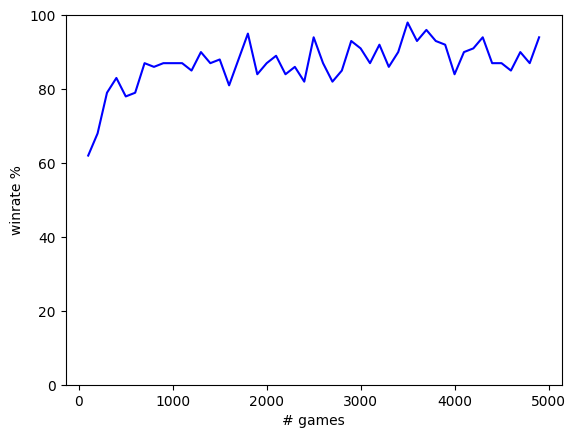

In [3]:
# alpha = 0.3, gamma = 0.9, epsilon = 0.1 -> (max_winrate, iteration) = (96.0, 4300)

info = {
    'alpha': 0.3,  # learning rate
    'gamma': 0.9,  # memory
    'epsilon': 0.1 # chance of making a random move
}

task4_Q(info)

## Oversimplified match

In [70]:
play_match(fixed_rules_strategy, pure_random, 10, k_size=None)